#  Data Exploration and Cleaning


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
# sns.set(style="whitegrid")

In [39]:
data = pd.read_csv('ecommerce_customer_data_large.csv')
data.head()



,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


#  Examine Data Types and Missing Values

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [6]:
if data['Customer Age'].equals(data['Age']):
    print("The columns 'Customer Age' and 'Age' are identical. Dropping one of them.")
    data = data.drop(columns=['Age'])
else:
    print("The columns 'Customer Age' and 'Age' are not identical.")

The columns 'Customer Age' and 'Age' are identical. Dropping one of them.


In [7]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Gender                       0
Churn                        0
dtype: int64


# Data Cleaning

Handle missing values in the 'Returns' column


In [13]:
#Fill missing 'Returns' values with 0 (assuming missing means no returns)
data['Returns'] = data['Returns'].fillna(0)


Convert 'Purchase Date' to datetime format

In [14]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce')


In [15]:
data.isnull().sum()


Customer ID                       0
Purchase Date                     0
Product Category                  0
Product Price                     0
Quantity                          0
Total Purchase Amount             0
Payment Method                    0
Customer Age                      0
Returns                           0
Customer Name                     0
Gender                            0
Churn                             0
Year                              0
Month                             0
Day                               0
Day of Week                       0
Total Purchase Amount_Lifetime    0
dtype: int64

# Feature Engineering

Extract date features from 'Purchase Date'

In [18]:
data['Year'] = data['Purchase Date'].dt.year
data['Month'] = data['Purchase Date'].dt.month
data['Day'] = data['Purchase Date'].dt.day
data['Day of Week'] = data['Purchase Date'].dt.dayofweek

Create a 'Customer Lifetime Value' feature by summing 'Total Purchase Amount' for each customer

In [19]:
data['Total Purchase Amount'] = data['Product Price'] * data['Quantity']
customer_lifetime_value = data.groupby('Customer ID')['Total Purchase Amount'].sum()
data = data.merge(customer_lifetime_value, on='Customer ID', suffixes=('', '_Lifetime'))
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Day,Day of Week,Total Purchase Amount_Lifetime,Total Purchase Amount_Lifetime,Total Purchase Amount_Lifetime
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,31,1.0,John Rivera,Female,0,2023,5,3,2,3336,3336,3336
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,31,1.0,John Rivera,Female,0,2021,5,16,6,3336,3336,3336
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,31,1.0,John Rivera,Female,0,2020,7,13,0,3336,3336,3336
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,31,0.0,John Rivera,Female,0,2023,1,17,1,3336,3336,3336
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,31,1.0,John Rivera,Female,0,2021,5,1,5,3336,3336,3336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,63,0.0,Gabriel Williams,Male,0,2023,1,24,1,436,436,436
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,66,1.0,Barry Foster,Female,0,2021,6,4,4,233,233,233
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,63,0.0,Lisa Johnson,Female,0,2022,11,10,3,2205,2205,2205
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,64,1.0,Melissa Fernandez,Male,0,2021,6,27,6,88,88,88


Calculate 'Returns Frequency' as the mean of 'Returns' per customer

In [20]:
returns_frequency = data.groupby('Customer ID')['Returns'].mean()
data = data.merge(returns_frequency, on='Customer ID', suffixes=('', '_Frequency'))
data


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Year,Month,Day,Day of Week,Total Purchase Amount_Lifetime,Total Purchase Amount_Lifetime,Total Purchase Amount_Lifetime,Returns_Frequency
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,31,1.0,John Rivera,Female,0,2023,5,3,2,3336,3336,3336,0.8
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,31,1.0,John Rivera,Female,0,2021,5,16,6,3336,3336,3336,0.8
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,31,1.0,John Rivera,Female,0,2020,7,13,0,3336,3336,3336,0.8
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,31,0.0,John Rivera,Female,0,2023,1,17,1,3336,3336,3336,0.8
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,31,1.0,John Rivera,Female,0,2021,5,1,5,3336,3336,3336,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,436,Cash,63,0.0,Gabriel Williams,Male,0,2023,1,24,1,436,436,436,0.0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,233,Credit Card,66,1.0,Barry Foster,Female,0,2021,6,4,4,233,233,233,1.0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,2205,Cash,63,0.0,Lisa Johnson,Female,0,2022,11,10,3,2205,2205,2205,0.0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,88,Cash,64,1.0,Melissa Fernandez,Male,0,2021,6,27,6,88,88,88,1.0


 Check the distribution of churned vs non-churned customers

In [21]:
data['Churn'].value_counts()


Churn
0    199870
1     50130
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

### Customer Segmentation by Product Category, Age, and Gender


- Distribution of purchases by product category

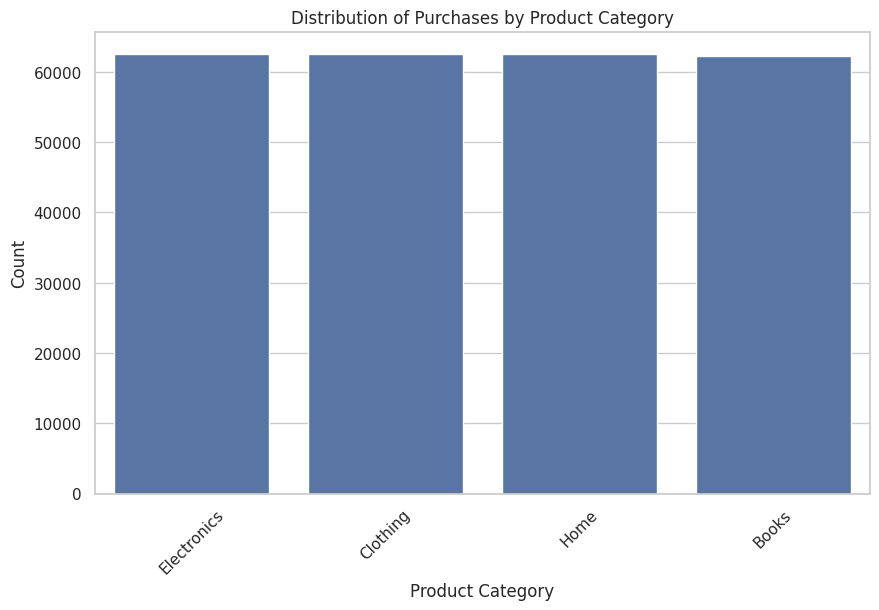

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product Category', order=data['Product Category'].value_counts().index)
plt.title('Distribution of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- Age distribution of customers

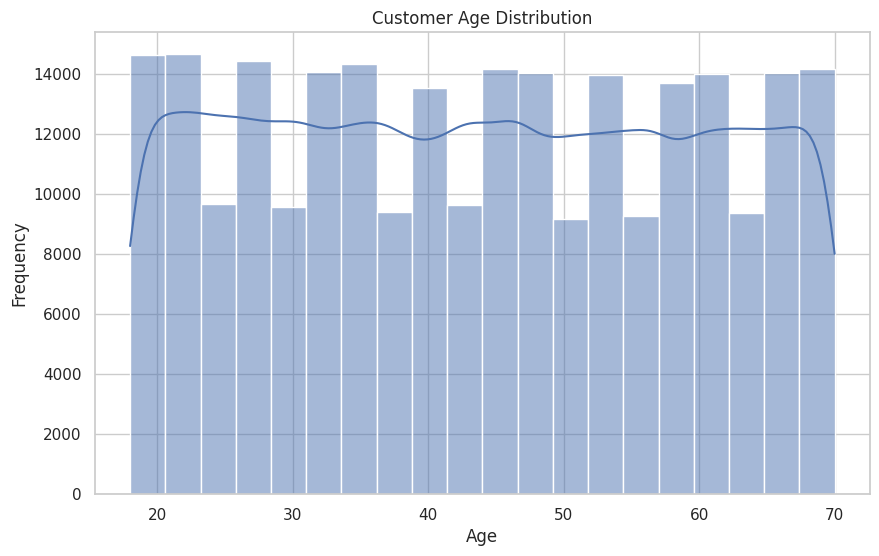

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Customer Age', bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Gender distribution

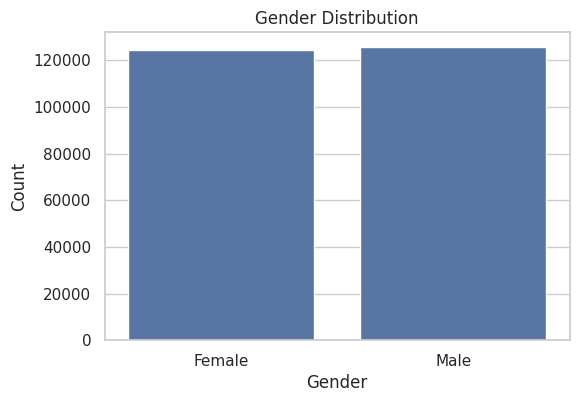

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Payment Preferences

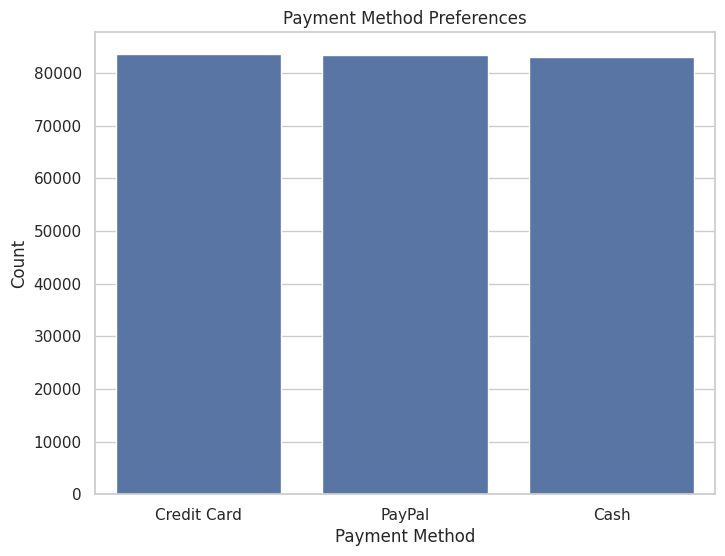

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment Method', order=data['Payment Method'].value_counts().index)
plt.title('Payment Method Preferences')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

### Churn Analysis

-  Distribution of Churn

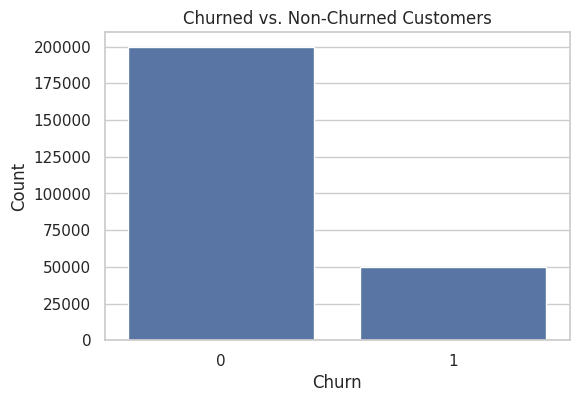

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title('Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


- Compare purchasing behavior for churned vs. non-churned customers

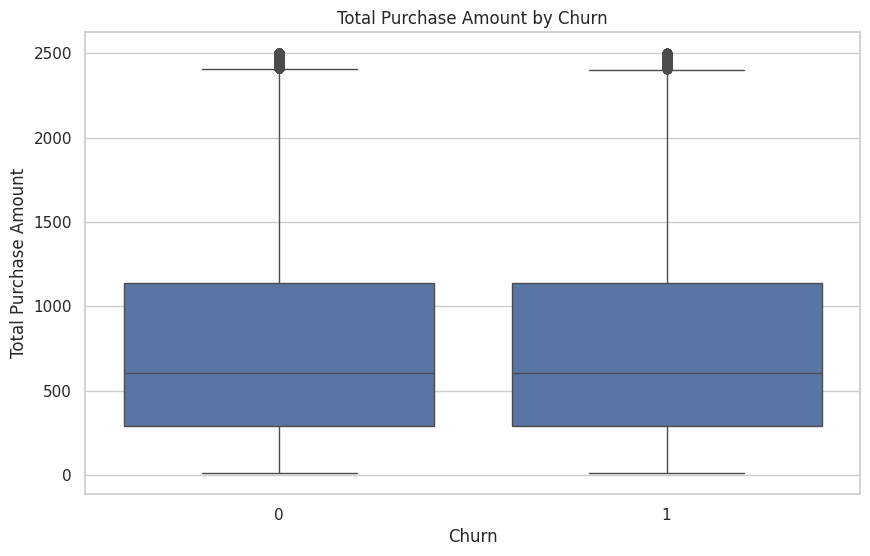

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Total Purchase Amount')
plt.title('Total Purchase Amount by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Purchase Amount')
plt.show()

### Visualization of High-Value Customers and Return Rates

- A plot of the top 10 customers by lifetime value

In [36]:
# Aggregate the total purchase amount by customer and sort in descending order to get the top 10
top_customers = data.groupby('Customer ID')['Total Purchase Amount_Lifetime'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.show()


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

### Histogram of Returns Frequency to identify satisfaction trends

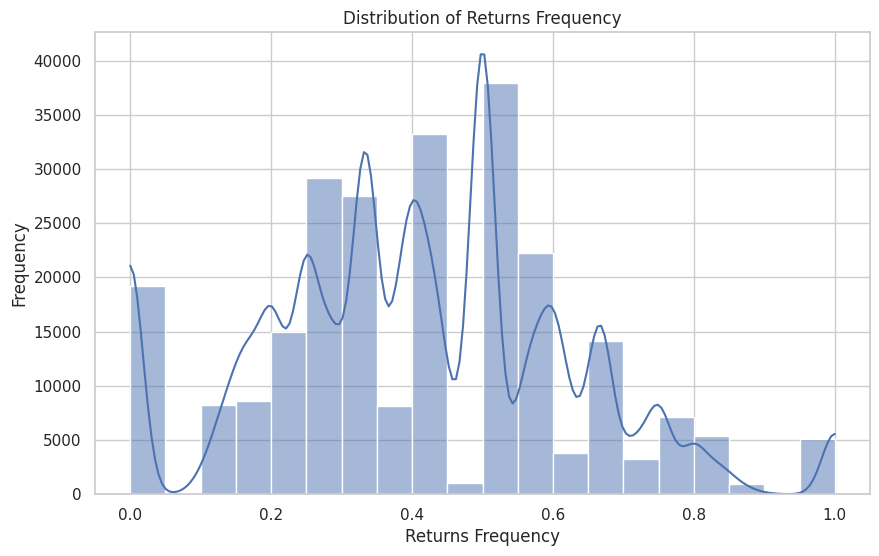

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Returns_Frequency'], bins=20, kde=True)
plt.title('Distribution of Returns Frequency')
plt.xlabel('Returns Frequency')
plt.ylabel('Frequency')
plt.show()

# Feature Selection and Model Development

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



### Select features and target variable

In [49]:
data = pd.get_dummies(data, columns=['Product Category', 'Gender', 'Payment Method'], drop_first=True)


KeyError: "None of [Index(['Product Category', 'Gender', 'Payment Method'], dtype='object')] are in the [columns]"

In [50]:

# Calculate the Returns_Frequency as the count of returns for each customer
data['Returns_Frequency'] = data.groupby('Customer ID')['Returns'].transform('sum')

# Calculate Total Purchase Amount_Lifetime by summing purchase amounts for each customer
data['Total Purchase Amount_Lifetime'] = data.groupby('Customer ID')['Total Purchase Amount'].transform('sum')

# Define feature matrix X and target variable y (using 'Churn' as an example target)
X = data[['Customer Age', 'Returns_Frequency', 'Total Purchase Amount_Lifetime'] + 
         [col for col in data.columns if col.startswith('Product Category') or col.startswith('Gender') or col.startswith('Payment Method')]]
y = data['Churn']  # Assuming 'Churn' is binary and serves as the target

# 3. Model Selection and Training



In [51]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Choose and Train a Model


### *Random Forest Classifier*

In [52]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

+ Feature Importance (for Tree-Based Models)

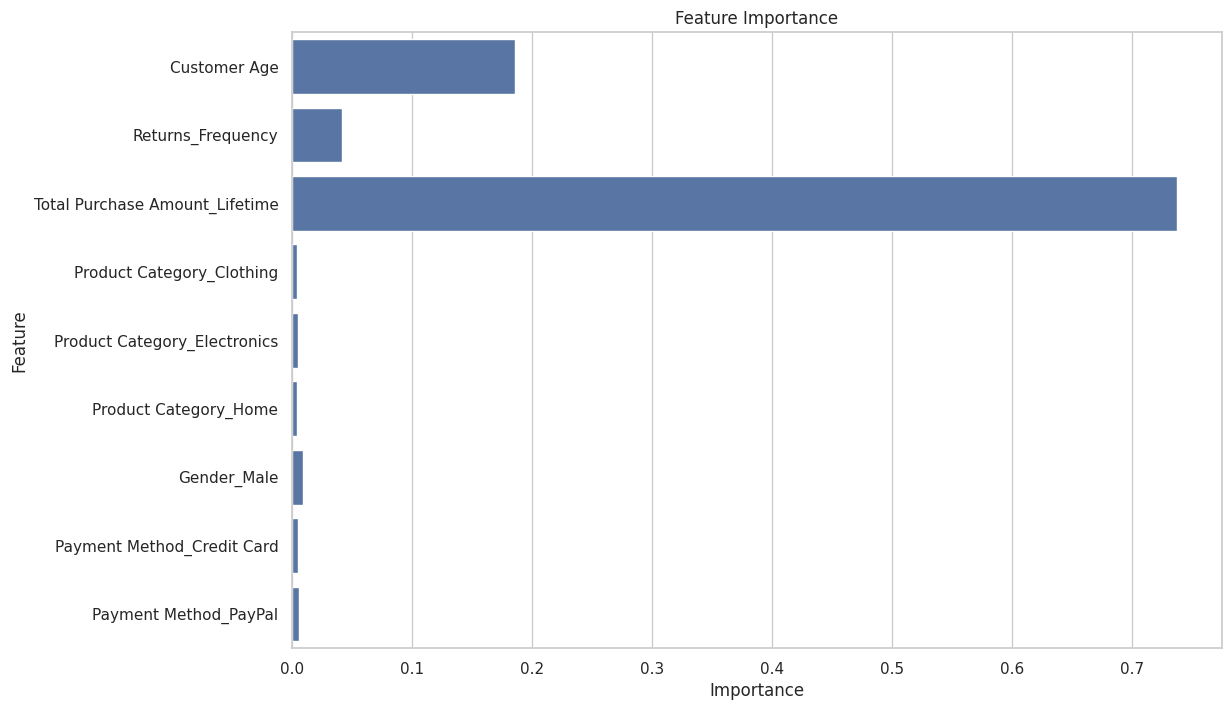

In [53]:
# Feature importance for Random Forest model
feature_importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


###  Model Evaluation

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.82
Precision: 0.55
Recall: 0.38
F1 Score: 0.45


## Plot Confusion Matrix

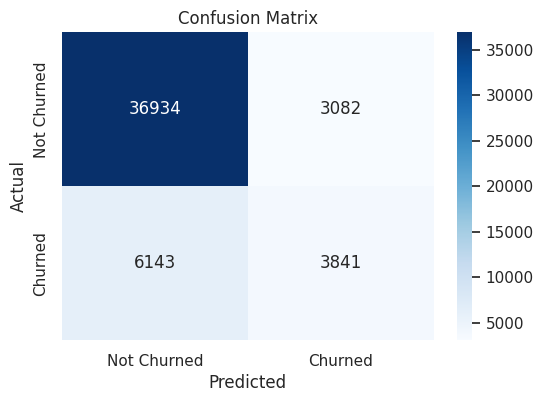

In [55]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
